
<h1 style="text-align:center;"></h1>

# <center>Clusterização de perfis de Crédito</center>

Autor: Alex Takishita  
Data: 23/04/2024  

# Introdução
Neste projeto, será realizada a modelagem do conjunto de dados de informações de clientes de uma empresa de cartão de crédito. O objetivo será gerar e analisar os grupos que compõem diferentes personas que consomem o produto cartão de crédito.

# Import das Bibliotecas

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings

# Filtrar os avisos que se deseja ocultar(UserWarnings e FutureWarnings)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Configuracao para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Versao das bibliotecas e do Python
library = {
    "Pandas": pd,
    "Matplotlib": mpl,
    "Seaborn": sns,
    "NumPy": np,
    "Sklearn":sklearn
    }

# Versao das bibliotecas
print("Library Version:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Library':^20} | {'Version':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, library in sorted(library.items()):
    print(f"{nome:<20} | {library.__version__:>10}")

# Versao do Python
print(f"{'':-^20} | {'':-^10}")
print(f"{'Python Version':<20} | {python_version():>10}")

Library Version:

-------------------- | ----------
      Library        |  Version  
-------------------- | ----------
Matplotlib           |      3.7.1
NumPy                |     1.25.2
Pandas               |      2.0.3
Seaborn              |     0.13.1
Sklearn              |      1.2.2
-------------------- | ----------
Python Version       |    3.10.12


A verificação acima sobre as versões utilizadas, tanto das bibliotecas, quanto do Python, é importante para garantir reprodutibilidade do código.

# DataSet

O conjunto de dados utilizado consiste em informações de aproximadamente 10.000 clientes, como idade, salário, estado civil, limite do cartão de crédito, categoria do cartão de crédito, etc.

Link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers  


Seguindo as recomendações contidas na descrição do dataset, serão removidas os dois últimos atributos à direita.



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data & Analytics/Projeto_Clusterizacao/BankChurners.csv')
df = df.iloc[:, :-2]

print('Composição do DataFrame:\nColunas: {} \nLinhas: {}\n'.format(df.shape[1],df.shape[0]))
# print(pd.DataFrame(df.columns, columns=['Atributos']))

df.head(5)

Composição do DataFrame:
Colunas: 21 
Linhas: 10127



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# EDA

Começaremos a análise exploratória dos dados, verificando as quantidades de valores únicos e nulos para cada atributo. Além dos tipos de variáveis que estamos trabalhando.

In [4]:
df_info = pd.DataFrame(df.dtypes,columns=['DType'])
df_info['Valores_Unicos'] = df.nunique().values
df_info['Valores_Nulos'] = df.isnull().sum().values
df_info.sort_index(inplace=True)

df_info

,DType,Valores_Unicos,Valores_Nulos
Attrition_Flag,object,2,0
Avg_Open_To_Buy,float64,6813,0
Avg_Utilization_Ratio,float64,964,0
CLIENTNUM,int64,10127,0
Card_Category,object,4,0
Contacts_Count_12_mon,int64,7,0
Credit_Limit,float64,6205,0
Customer_Age,int64,45,0
Dependent_count,int64,6,0
Education_Level,object,7,0


In [5]:
# Quantidade de linhas duplicadas
df.duplicated().sum()

0

In [6]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


Pontos importantes:  

* O conjunto de dados não possui dados nulos;
* Não há linhas duplicadas;
* **Variável identificadora:** CLIENTNUM;
* **Variáveis Categóricas:** Attrition_Flag, Gender, Education_Level, Marital_Status, Card_Category, Income_Category
* **Variáveis Numéricas:** Avg_Open_To_Buy, Contacts_Count_12_mon, Credit_Limit, Customer_Age, Dependent_count, Months_Inactive_12_mon, Months_on_book, Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct.

O Código que representa o número do cliente não é importante para a formação dos grupos, portanto pode ser descartado.

In [7]:
df = df.drop(columns=['CLIENTNUM'])

## Visualização das Variáveis

Iremos analisar a distribuição das variáveis categóricas e numéricas e aplicar agregações ou remover dados, caso aplicável.


### Variáveis Categóricas

Iremos começar as análises pelas variáveis categóricas. Para isso, iremos observar os gráficos de histograma.

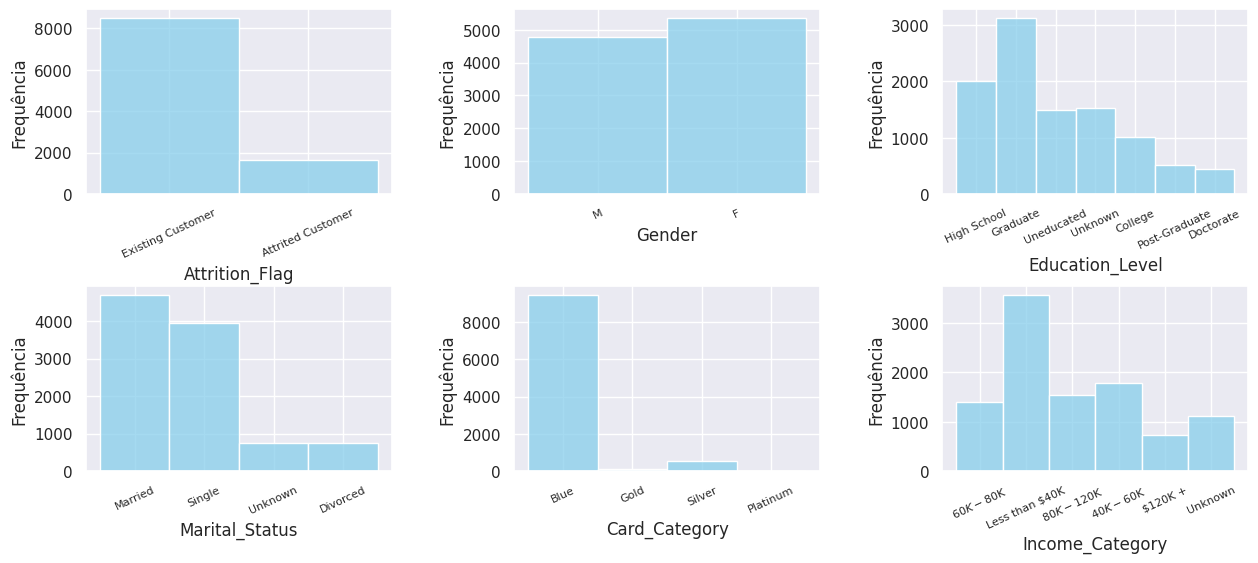

In [8]:
import matplotlib.pyplot as plt

# Atributos categoricos
atributos_cat = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category',
                 'Income_Category']

# Funcao para criar os graficos
def plot_histogramas(df, x_vars):
    sns.set_theme(style="darkgrid")

    num_plots = len(x_vars)
    num_rows = (num_plots - 1) // 2  # Numero de linhas
    num_cols = 3  # Numero de colunas

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

    # Ajuste para o caso de haver um numero impar de subplots
    if num_plots % 2 != 0:
        axs[-1, -1].remove()

    for i, x_var in enumerate(x_vars):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data=df, x=x_var, ax=axs[row, col], color="skyblue")

    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    for ax in axs.flat:
        ax.set_ylabel("Frequência")
        ax.tick_params(axis='x', labelrotation=25, labelsize = 8)

    plt.show()

plot_histogramas(df, atributos_cat)

In [9]:
print(df['Income_Category'].value_counts(),'\n')
print(df['Card_Category'].value_counts(),'\n')
print(df['Marital_Status'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


Com o intuito de diminuir a complexidade de cada atributo, algumas conclusões podem ser tomadas:

* **Flag de Atrito:** Não é necessário aplicar nenhuma modificação nesse primeiro momento. Mas é perceptível que há um desbalanceamento entre as categorias.
* **Sexo:** Há uma boa distribuição entre as categorias e não é necessário transformações.
* **Nível de Educação:** Há grande amostragem com públicos entre o Ensino Médio, Ensino Superior, Graduado, Sem Educação e Desconhecido. Portanto uma boa amostragem. Nesse caso não há necessidade de lidar com Desconhecido.
* **Estado Civil:** Para o agrupamento, a informação "Divorciado" é o mesmo que estar Solteiro, já que a composição de renda, não é afetado por um par. Portanto, a categoria "Divorciado" será substituída por "Solteiro".
* **Categoria do Cartão:** Como as categorias Gold, Silver e Platinum possuem baixa amostragem e teoricamente não há tanto impacto na análise, uma vez que há informações de renda, pode-se uní-las em uma única categoria.
* **Renda Anual:** Como é uma informação muito importante para o Agrupamento, e também para facilitar o treinamento, será descartado as linhas em que os valores são "Desconhecidos".

In [10]:
# Removendo linhas com renda desconhecida
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)
# Convertendo estados civil 'Divorciado' para 'Solteiro'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')
# Agregando as categorias do cartao
df['Card_Category'] = df['Card_Category'].replace(['Gold','Silver','Platinum'], 'Silver+')

In [11]:
print(df['Income_Category'].value_counts(),'\n')
print(df['Card_Category'].value_counts(),'\n')
print(df['Marital_Status'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64 

Card_Category
Blue       8391
Silver+     624
Name: count, dtype: int64 

Marital_Status
Married    4194
Single     4154
Unknown     667
Name: count, dtype: int64


### Variáveis Numéricas

Agora serão analisadas as variáveis numéricas. Para isso, iremos observar o gráficos de histograma e de boxplot de cada atributo

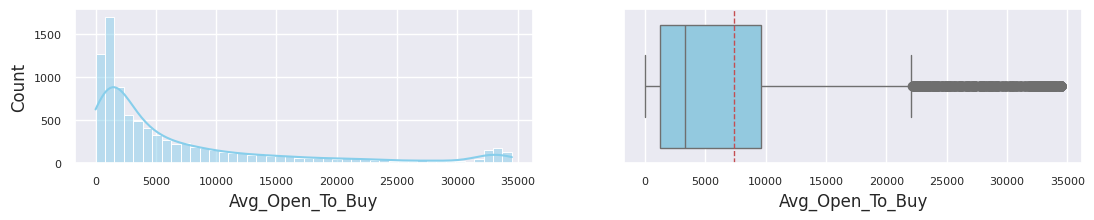

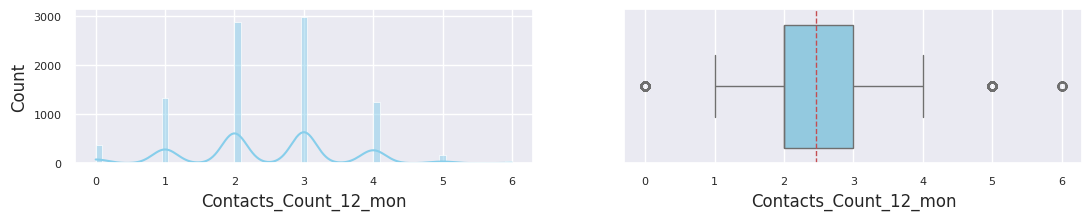

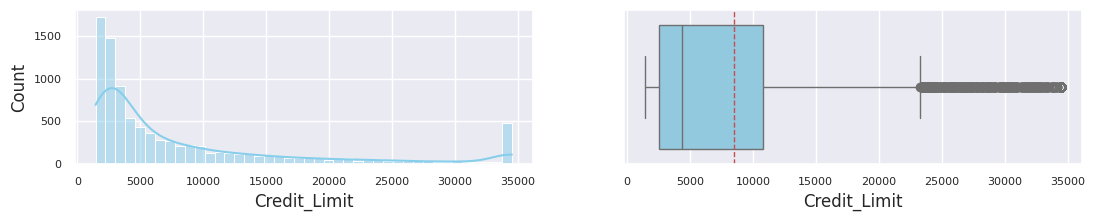

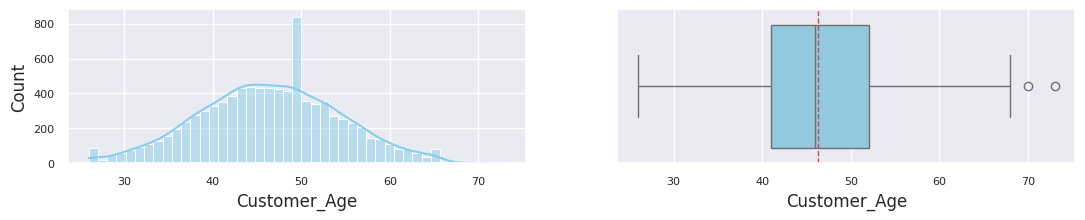

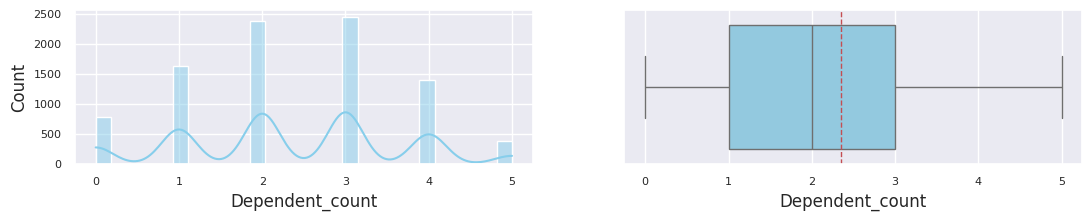

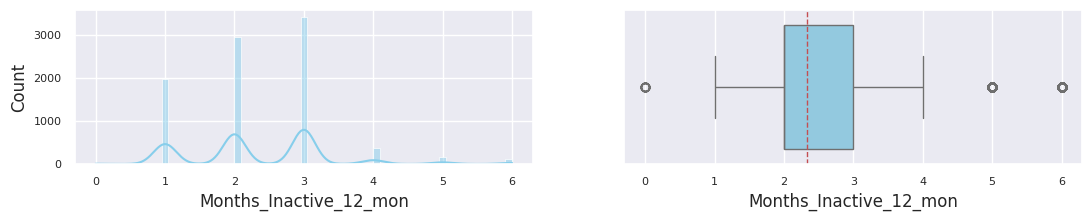

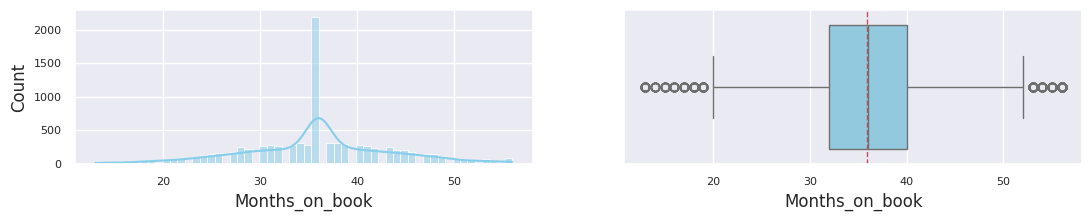

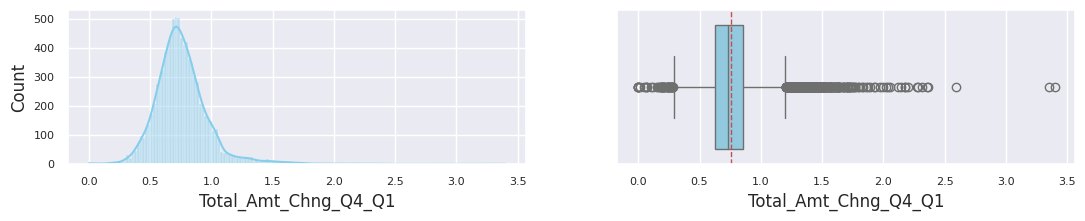

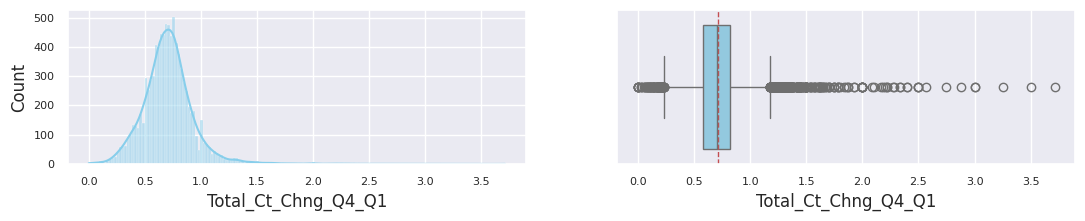

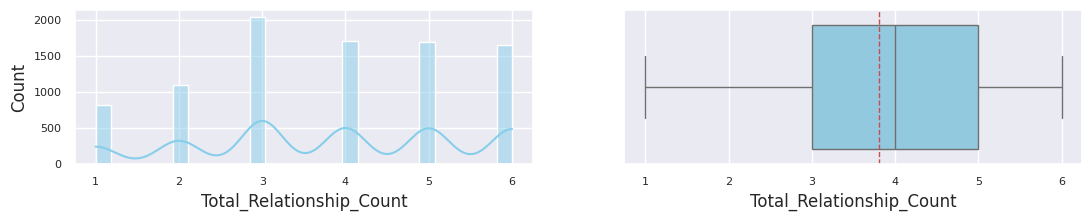

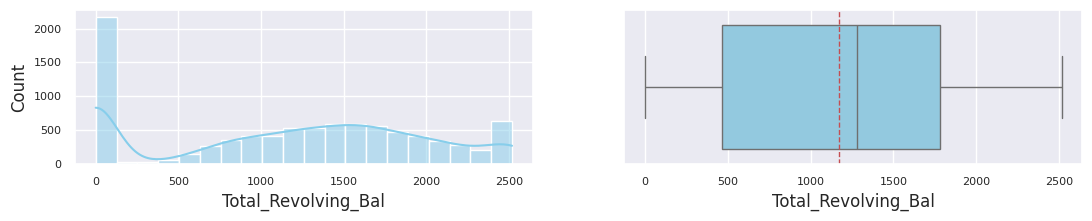

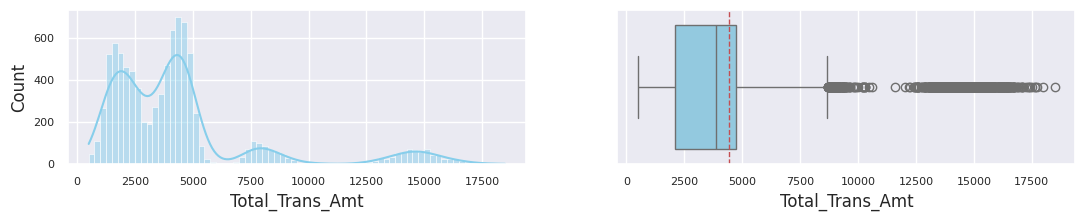

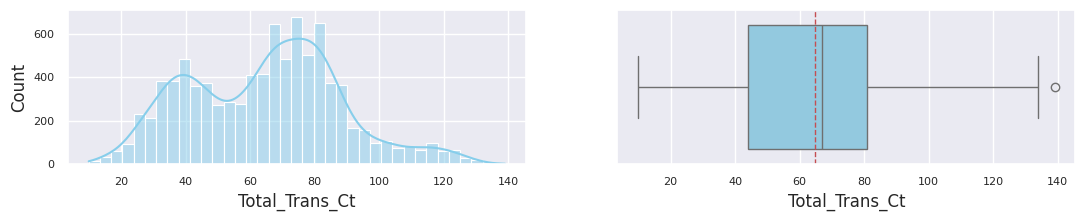

In [12]:
# Atributos numericos
atributos_num = ['Avg_Open_To_Buy','Contacts_Count_12_mon','Credit_Limit','Customer_Age',
'Dependent_count','Months_Inactive_12_mon','Months_on_book',
'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count',
'Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']

# Funcao para criar os graficos
def plot_numerica(df, atributo):
    sns.set_theme(style="darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(13, 2))

    sns.histplot(data=df, x=atributo, ax=axs[0], color="skyblue", kde=True)

    media = df[atributo].mean()
    sns.boxplot(data=df, x=atributo, ax=axs[1], color="skyblue")
    plt.axvline(x=media, color='r', linestyle='--', linewidth=1)

    plt.subplots_adjust(wspace=0.2, hspace=0.5)

    for ax in axs:
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

    plt.show()

for atributo in atributos_num:
  plot_numerica(df,atributo)

**Conclusões:**  

* **Avg_Open_To_Buy:** Vejamos que há uma distribuição inversamente proporcional até mais ou menos 25000. E depois desse valor, há uma concentração que poderia ser analisada como sendo outliers.
* **Contacts_Count_12_mon:** Há uma concentração de 1 a 4 contatos efetuados nos últimos 12 meses e média de 2,5 contatos. Não há o que se normalizar.
* **Credit_Limit:** O atributo de limite de crédito tem distribuição muito parecida com o atributo *'Avg_Open_To_Buy'*, com a mesma análise. Possível correlação entre essas variáveis.
* **Customer_Age:** Distribuição Normal. Apenas deverá passar por normalização.
* **Dependent_count:** Distribuição Normal.
* **Months_Inactive_12_mon:** Maior concentração entre 1 e 3 meses de inatividade nos últimos 12 meses.
* **Months_on_book:** Possível correlação com a idade do cliente.
* **Total_Amt_Chng_Q4_Q1:** Distribuição Normal. Possíveis Outliers.
* **Total_Ct_Chng_Q4_Q1:** Possível correlação com o atributo *Total_Amt_Chng_Q4_Q1*.
* **Total_Relationship_Count:** Distribuição quase uniforme no total de produtos mantidos.
* **Total_Revolving_Bal:** Grande concentração de saldo rotativo zero. Isto é, clientes que pagam em dia a fatura. E uma distribuição normal, dos que não pagam a fatura em dia, gerando saldo rotativo.
* **Total_Trans_Amt:** Soma dos valores transferidos do cliente. Há valores discrepantes.
* **Total_Trans_Ct:** Quantidade de transações efetuadas pelo cliente.

## Análise da correlação das variáveis

Com o intuito de diminuir a dimensionalidade do nosso conjunto de dados, iremos analisar se há correlação entre as variáveis.  

Para poder analisar as variáveis categóricas também, será aplicado o método *'get_dummies'* para converter as categorias em novas variáveis.

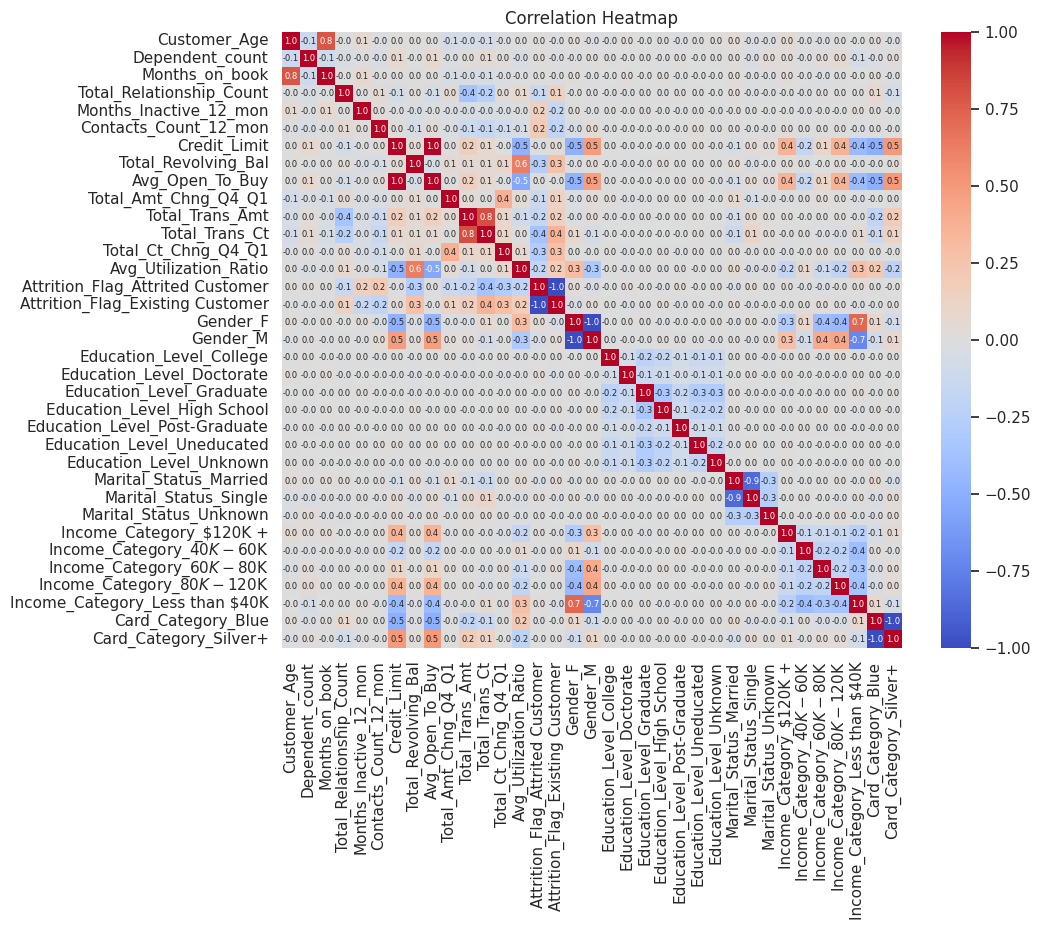

In [13]:
# Criacao das variaveis dummies
df_dummies = pd.get_dummies(df)

# Heatmap de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".1f",
            annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

Podemos ver que a variável de *"Meses no book"* está correlacionada com a idade do cliente (conforme haviámos previsto através dos gráficos). Logo, é redundante manter ambas as informações, sendo preferível manter apenas a idade do cliente.
Analogamente, a variável de *"Média de Linha de Crédito Aberta para Compra"* é redundante ao Limite de Crédito, assim como a Quantidade Total de Transferências o é com o Valor Total em Transferências, sendo preferível manter o valor.

Sendo assim, os atributos Months_on_book, Avg_Open_To_Buy e Total_Trans_Ct serão excluídos do dataframe.

In [14]:
df.drop('Months_on_book',axis=1,inplace=True)
df.drop('Avg_Open_To_Buy',axis=1,inplace=True)
df.drop('Total_Trans_Ct',axis=1,inplace=True)

# Pré-Processamento

A seguir, iremos realizar o pré-processamento das variáveis para prepará-las para a modelagem. Este processo inclui etapas como codificação de variáveis categóricas, normalização de variáveis numéricas e transformação de distribuições. Será utilizada a classe *'ColumnTransformer'* da biblioteca scikit-learn para aplicar diferentes transformações a diferentes conjuntos de colunas.

In [15]:
from sklearn.preprocessing import (OneHotEncoder,StandardScaler,
                                   MinMaxScaler,PowerTransformer,
                                   OrdinalEncoder)
from sklearn.compose import ColumnTransformer

# Variaveis a serem codificadas ordinalmente
# -- Desconsiderado por alto impacto na dispersão dos grupos. Menos coesos
# ord_enc_cols = ['Education_Level',"Income_Category"]

# Variaveis a serem convertidas com one-hot encoding devido a poucas categorias
one_hot_cols = ['Education_Level',"Income_Category",
                'Attrition_Flag',"Gender",'Marital_Status',
                "Card_Category"]

# Variaveis a serem padronizadas
standard_cols = ["Customer_Age", "Total_Amt_Chng_Q4_Q1",
                 "Total_Ct_Chng_Q4_Q1", "Total_Relationship_Count",
                 "Months_Inactive_12_mon", "Contacts_Count_12_mon",
                 "Dependent_count"]

# Variaveis a serem a convertidas por uma transformacao de potêencia
# para deixar a distribuicao mais gaussiana
power_cols = ["Total_Revolving_Bal","Credit_Limit",
              "Avg_Utilization_Ratio"]

# Normalizadas por intervalo de max e min
minmax_cols = ["Total_Trans_Amt","Total_Revolving_Bal"]


# Aplicacao das transformacoes
preprocessing = ColumnTransformer(
    [
        # ("label-enc", OrdinalEncoder(), ord_enc_cols),
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  0.        , ..., -0.0188401 ,
         0.9866723 , -0.7875768 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.06214426,
         0.59928897, -0.52422123],
       [ 0.        ,  0.        ,  1.        , ..., -1.6789404 ,
        -0.37953846, -1.20649748],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.6789404 ,
         0.163654  , -1.20649748],
       [ 0.        ,  0.        ,  1.        , ..., -1.6789404 ,
         0.13720785, -1.20649748],
       [ 0.        ,  0.        ,  1.        , ...,  0.82679964,
         0.81275693, -0.09422051]])

In [16]:
# Dataframe transformado

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Education_Level_College,one-hot__Education_Level_Doctorate,one-hot__Education_Level_Graduate,one-hot__Education_Level_High School,one-hot__Education_Level_Post-Graduate,one-hot__Education_Level_Uneducated,one-hot__Education_Level_Unknown,one-hot__Income_Category_$120K +,one-hot__Income_Category_$40K - $60K,one-hot__Income_Category_$60K - $80K,one-hot__Income_Category_$80K - $120K,one-hot__Income_Category_Less than $40K,one-hot__Attrition_Flag_Attrited Customer,one-hot__Attrition_Flag_Existing Customer,one-hot__Gender_F,one-hot__Gender_M,one-hot__Marital_Status_Married,one-hot__Marital_Status_Single,one-hot__Marital_Status_Unknown,one-hot__Card_Category_Blue,one-hot__Card_Category_Silver+,standard__Customer_Age,standard__Total_Amt_Chng_Q4_Q1,standard__Total_Ct_Chng_Q4_Q1,standard__Total_Relationship_Count,standard__Months_Inactive_12_mon,standard__Contacts_Count_12_mon,standard__Dependent_count,minmax__Total_Trans_Amt,minmax__Total_Revolving_Bal,power__Total_Revolving_Bal,power__Credit_Limit,power__Avg_Utilization_Ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.167938,2.619726,3.849420,0.763262,-1.329784,0.492457,0.498069,0.035273,0.308701,-0.018840,0.986672,-0.787577
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.336254,3.557176,12.652666,1.405908,-1.329784,-0.410247,2.042382,0.043452,0.343266,0.062144,0.599289,-0.524221
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.588351,8.349096,6.833000,0.120616,-1.329784,-2.215655,0.498069,0.076611,0.000000,-1.678940,-0.379538,-1.206497
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.798179,2.938277,6.833000,-0.522029,1.653790,-1.312951,1.270225,0.036775,1.000000,1.117498,-0.419383,1.466399
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.798179,6.442339,7.536754,0.763262,-1.329784,-2.215655,0.498069,0.017025,0.000000,-1.678940,0.009527,-1.206497


A efeito de comparação, pode-se gerar os mesmos gráficos para as variáveis numéricas e notar que a distribuição se mantém.

In [17]:
# Apenas atributos numericos. Que nao comecam com one ou label
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith(("one", "label"))]
scaled_columns_not_one_hot

Index(['standard__Customer_Age', 'standard__Total_Amt_Chng_Q4_Q1',
       'standard__Total_Ct_Chng_Q4_Q1', 'standard__Total_Relationship_Count',
       'standard__Months_Inactive_12_mon', 'standard__Contacts_Count_12_mon',
       'standard__Dependent_count', 'minmax__Total_Trans_Amt',
       'minmax__Total_Revolving_Bal', 'power__Total_Revolving_Bal',
       'power__Credit_Limit', 'power__Avg_Utilization_Ratio'],
      dtype='object')

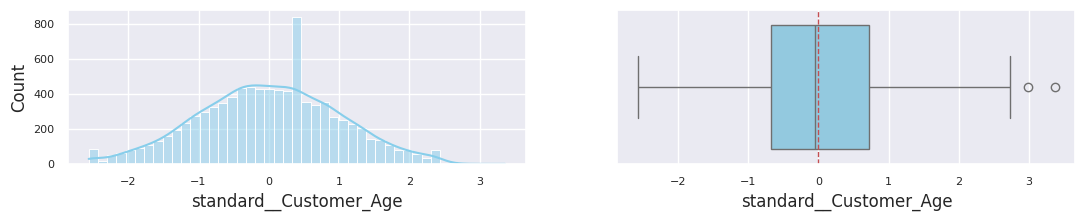

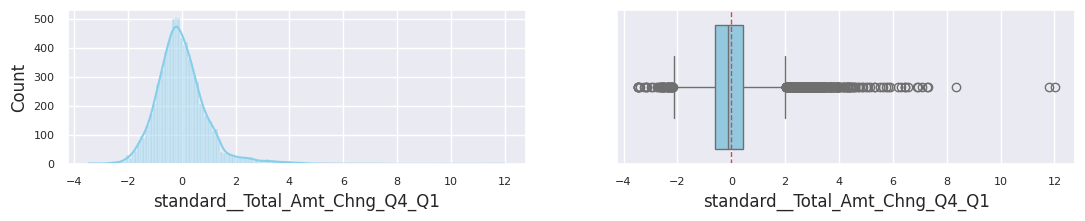

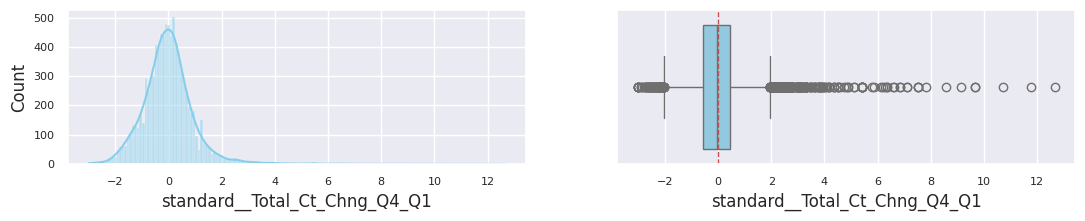

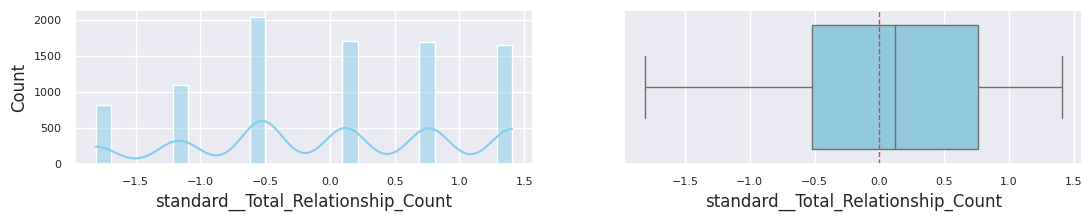

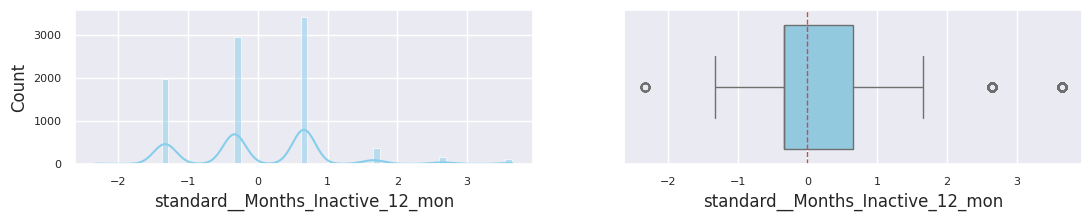

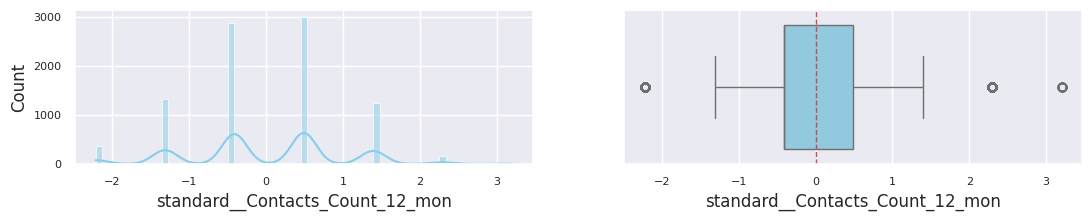

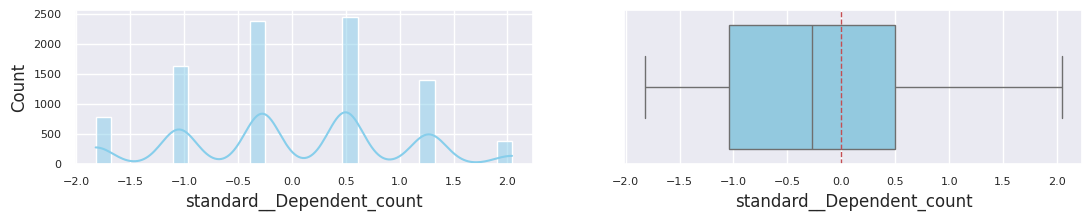

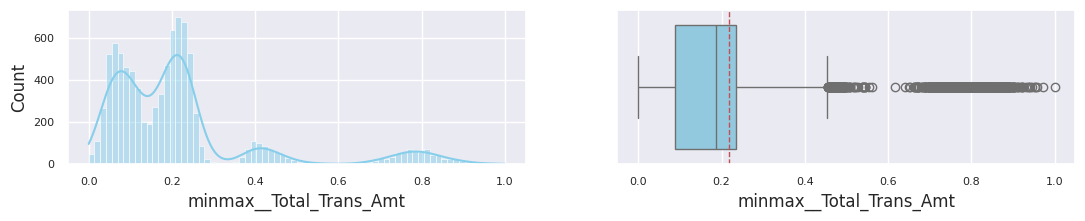

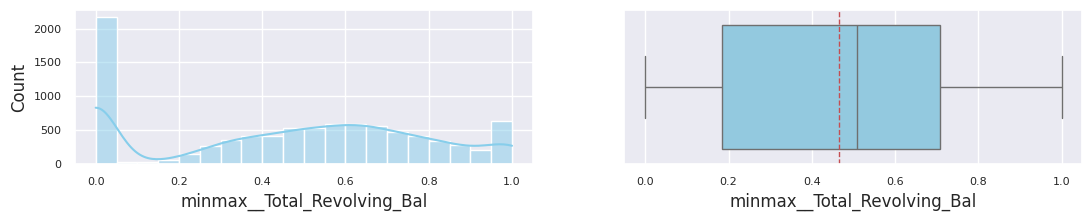

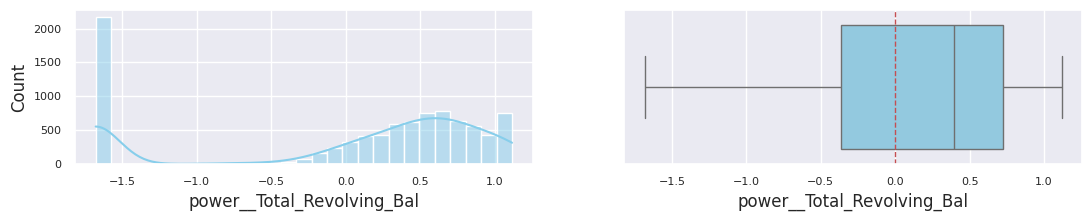

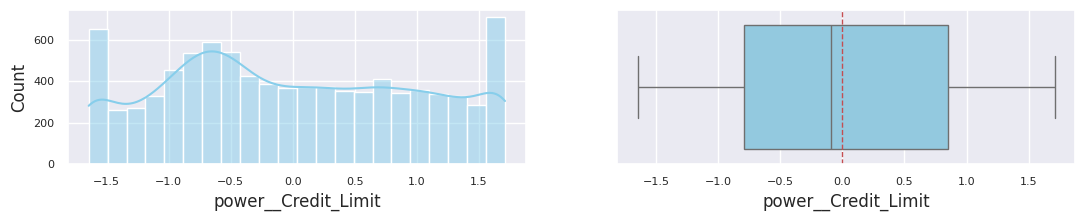

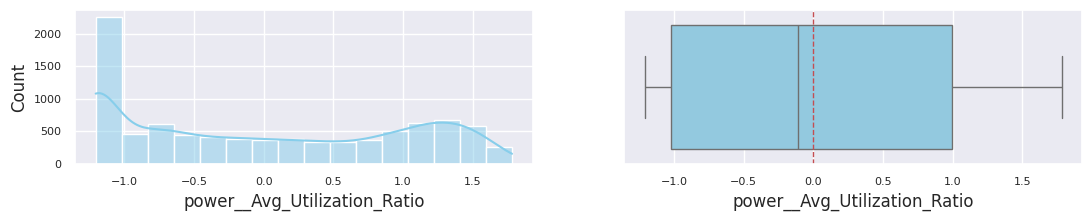

In [18]:
for atributo in scaled_columns_not_one_hot:
  plot_numerica(df_scaled,atributo)

Conforme esperado, o mesmo padrão observado anteriomente para as variáveis numéricas, se manteve após as transformações, com apenas a mudança de seus intervalos.

# Modelagem

Com os atributos transformados, podemos aplicar a modelagem de clusterização. Para isso, será utilizada o K-Means.  

Para avaliar o modelo, serão utilizadas as métricas de inércia (Soma dos erros quadráticos) e Silhueta.

## Modelo Genérico

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instanciação do modelo KMeans com 5 Grupos
kmeans = KMeans(n_clusters=5, random_state=42)

# Treinamento do modelo
kmeans.fit(df_scaled)

# Calculo de Inercia e Silhueta
print('Inércia = %.2f' %kmeans.inertia_)
print('silhueta média = %.2f' %silhouette_score(df_scaled, kmeans.labels_))

Inércia = 87702.40
silhueta média = 0.09


Os valores calculados para 5 clusters sugerem:

* Inércia relativamente alta. Os clusters podem não ser tão compactos quanto o desejado.
* O coeficiente de silhueta é baixo, indicando que os clusters não estão bem separados e os pontos podem estar mais próximos dos clusters vizinhos do que do seu próprio cluster.

## Escolha do número de grupos

A seguir serão gerados os gráficos de Cotovelo e Silhueta para de 2 a 10 grupos, de modo a ser escolhido a quantidade de grupos ideal.

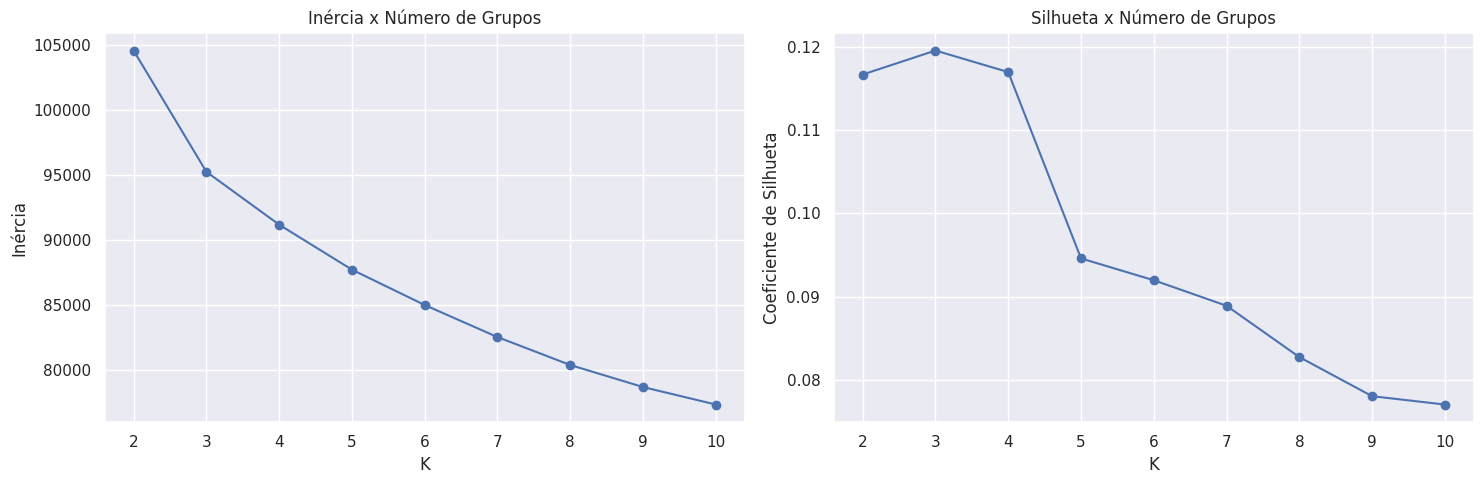

In [20]:
# lista para armazenar os valores de inercia e silhueta
inercia_val = []
silhueta_val = []

n_cluster = range(2, 11)

for k in n_cluster:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    inercia_val.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_,)
    silhueta_val.append(silhouette_avg)

# Gráficos
plt.figure(figsize=(15, 5))

# gráfico Cotovelo
plt.subplot(1, 2, 1)
plt.plot(n_cluster, inercia_val, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Inércia')
plt.title('Inércia x Número de Grupos')

# gráfico Silhueta
plt.subplot(1, 2, 2)
plt.plot(n_cluster, silhueta_val, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Silhueta x Número de Grupos')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

plt.show()

Os gráficos sugerem que a melhor escolha são 3 grupos como o modelo ideal. Haja visto que a maior diferença entre dois Ks subsequentes no gráfico do Inércia ocorre de 2 para 3, e o maior coeficiente de Silhueta ocorre em K = 3.

# Modelo Final


Para o modelo final, vamos construir um pipeline que inclui etapas de pré-processamento, redução de dimensionalidade usando PCA e clusterização com o KMeans. Depois de definir o pipeline, vamos ajustá-lo aos nossos dados usando o método fit.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=42)),
        ("clustering", KMeans(n_clusters=3, random_state=42))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education_Level',
                                                   'Income_Category',
                                                   'Attrition_Flag', 'Gender',
                                                   'Marital_Status',
                                                   'Card_Category']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Dependent_count']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Total_Trans_Amt',
                                                   'Total_Revolving_Bal']),
                                                 ('power', PowerTransformer(),
                                                  ['Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering', KMeans(n_clusters=3, random_state=42))])

In [22]:
# Dataframe com os dados rotulados com os grupos

df_grupos = df.copy()
df_grupos["Grupo"] = pipeline["clustering"].labels_

df_grupos.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Grupo
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,1.625,0.061,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,3.714,0.105,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,2.333,0.000,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,2.333,0.760,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,2.500,0.000,1


# PCA

Antes de analisarmos os clusters gerados, vamos observar os grupos através da redução de dimensionalidade com o PCA para uma dimensão 2D, i.e., duas componentes principais.

In [23]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca["Grupo"] = pipeline["clustering"].labels_
df_pca.head()

,pca0,pca1,Grupo
0,0.144060,3.993817,1
1,2.763157,7.657235,1
2,1.057791,6.897088,1
3,3.673939,4.125161,1
4,0.863913,6.711003,1


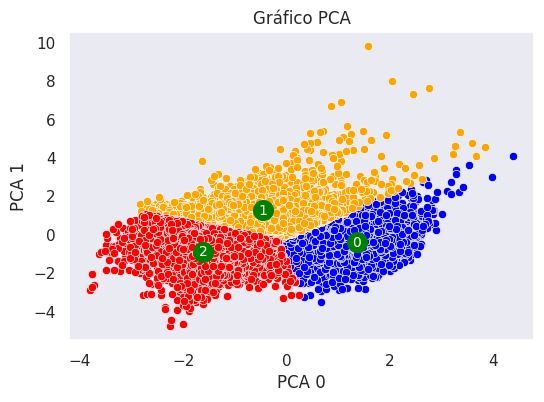

In [24]:
# Centroides
centroids = pipeline["clustering"].cluster_centers_
x = [ponto[0] for ponto in centroids]
y = [ponto[1] for ponto in centroids]

# Pontos de cada grupo
df_pca_0 = df_pca[df_pca['Grupo'] == 0]
df_pca_1 = df_pca[df_pca['Grupo'] == 1]
df_pca_2 = df_pca[df_pca['Grupo'] == 2]

# Grafico de dispersao
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_pca_0, x='pca0', y='pca1',color='blue')
sns.scatterplot(data=df_pca_1, x='pca0', y='pca1',color='orange')
sns.scatterplot(data=df_pca_2, x='pca0', y='pca1',color='red')
plt.scatter(x, y, s=200, color='green')
for i, txt in enumerate(range(len(centroids))):
    plt.text(x[i], y[i], str(txt), fontsize=10, color='white', ha='center', va='center')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Gráfico PCA')
plt.grid(False)
plt.show()

Através da técnica de redução de Dimensionalidade, é perceptível a divisão dos grupos e a relação dos pontos com os seus respectivos centróides.  
Embora existam alguns pontos dispersos, principalmente no grupo 1, não demonstram ser coesos o suficiente entre si para gerar um padrão de um novo grupo.

# Análise dos Grupos

Nesta seção, será realizada uma análise sobre os grupos gerados, com o intuito de entender as características de cada grupo.

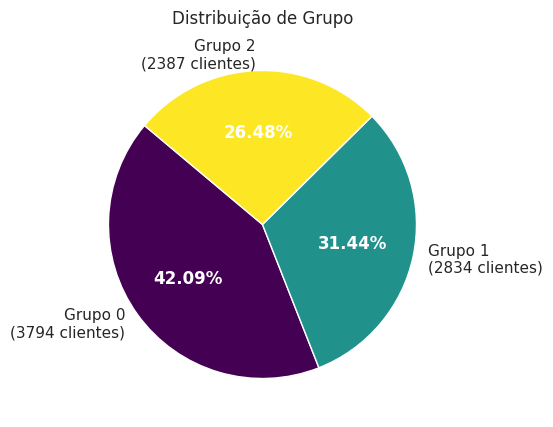

In [25]:
# Qtd. de clientes em cada grupo
qtd_clientes = df_grupos["Grupo"].value_counts().sort_index()

# Calculando as porcentagens
percentagens = qtd_clientes / qtd_clientes.sum() * 100

# Criando rotulos com quantidades
rotulos = [f'Grupo {grupo}\n({qtd} clientes)'
           for grupo, qtd in zip(qtd_clientes.index, qtd_clientes)]

cores = ['#440154','#21918c','#fde725']

# Grafico
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(qtd_clientes,
                                    labels=rotulos,
                                    autopct='%1.2f%%',
                                    startangle=140,
                                    colors=cores)
plt.title('Distribuição de Grupo')

# Estilo do texto dentro do grafico
plt.setp(autotexts, size=12, weight="bold", color='white')

plt.show()

O grupo 0 possui maior quantidade de clientes enquanto que os grupos 1 e 2 possuem quantidades semelhantes.

## Variáveis Categóricas

Iremos analisar as variáveis categóricas e na sequência, as numéricas

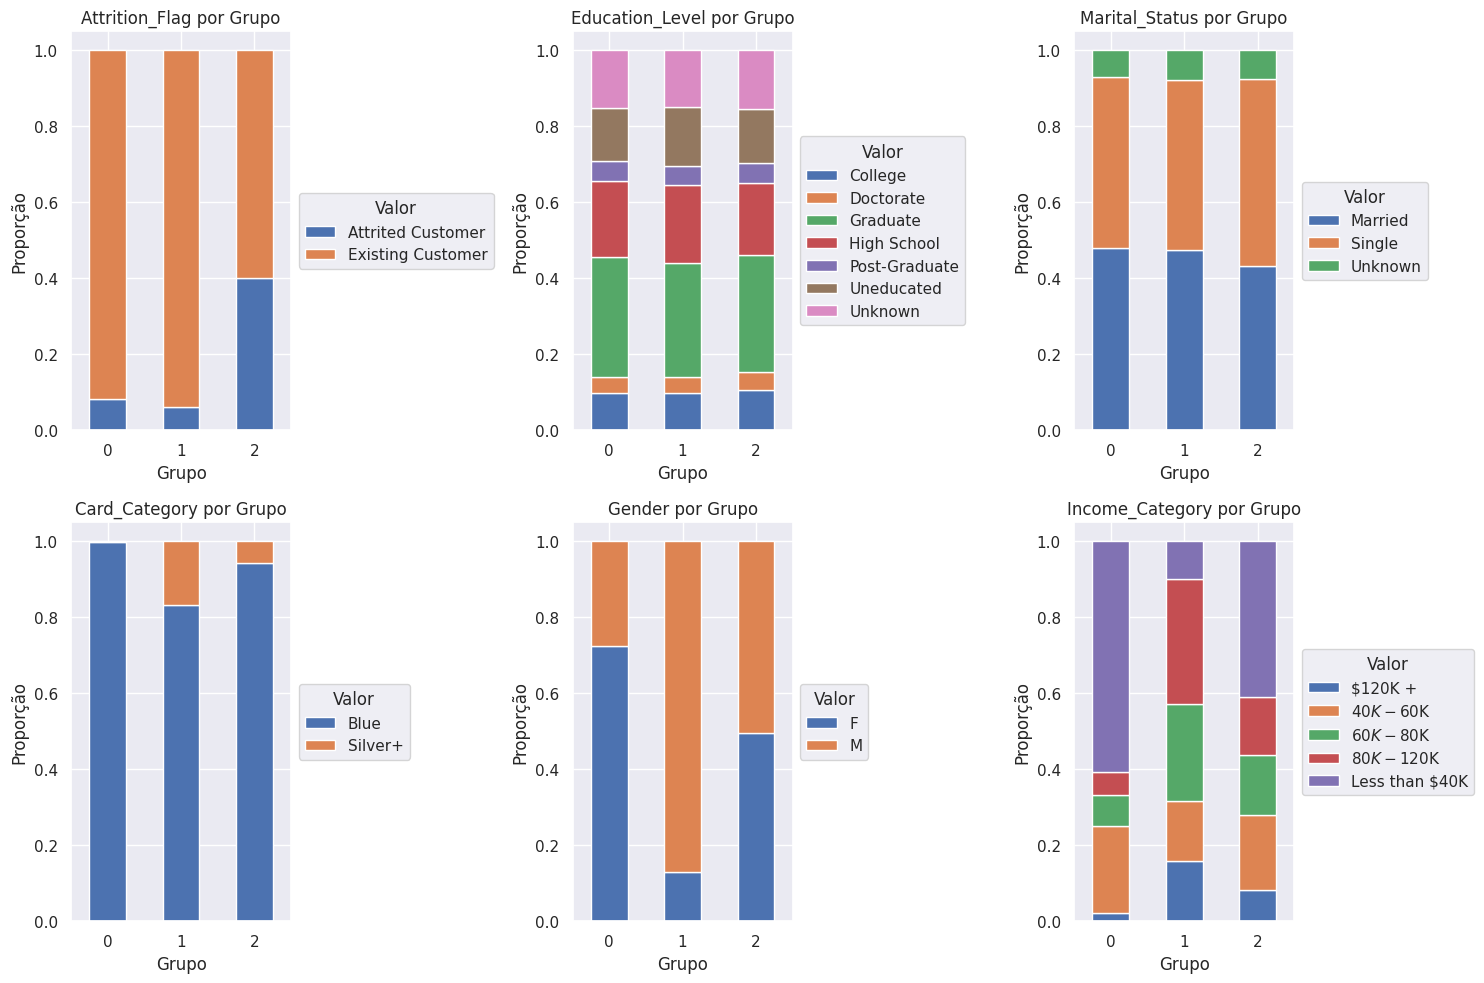

In [26]:
atributos_cat = ['Attrition_Flag', 'Education_Level',
                 'Marital_Status', 'Card_Category',
                 'Gender', 'Income_Category']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(atributos_cat):
    # Calcula a distribuicao da variavel em cada grupo
    distribuicao = df_grupos.groupby('Grupo')[col].value_counts(normalize=True).unstack()

    # Plota o grafico de barras empilhadas
    ax = axs[i // 3, i % 3]
    distribuicao.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{col} por Grupo')
    ax.set_xlabel('Grupo')
    ax.set_ylabel('Proporção')
    ax.tick_params(axis='x', labelrotation=0)
    # Adiciona a legenda ao lado
    ax.legend(title='Valor', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()

### Observações

* **Attrition_Flag:** Variável com distribuição semelhante entre os Grupos 0 e 1 e com uma quantidade consideravelmente alta no Grupo 2 (40%).
* **Education_Level e Marital_Status:** Possuem distribuição semelhantes entre os grupos.
* **Card_Category:** Devido a desproporção das categorias em nossa base (95% Blue Card), o Grupo 1 possuir quase 20% de Silver+ é notório. Assim como também o é o Grupo 0 possuir 100% de Blue Card.
* **Gender:** O Grupo 2 possui uma distribuição balanceada, enquanto que o Grupo 0 possui 75% de mulheres e o 1, 90% de homens.
* **Income_Category:** O Grupo 0 possui maior percentual de pessoas que ganham até 40k no ano (60%), dentre os 3 grupos. Enquanto que o grupo 1 possui majoritariamente os clientes que ganham acima de 40k, com aproximadamente 10% que ganham abaixo de 40k. Já o Grupo 2 possui aproximadamente 40% de pessoas com renda de até 40k anual, e uma distribuição mais homogênea entre as demais categorias.

## Variáveis Numéricas

Seguimos agora para a análise das variáveis numéricas. Para isso, será gerado o gráficos de pares de algumas variáveis.

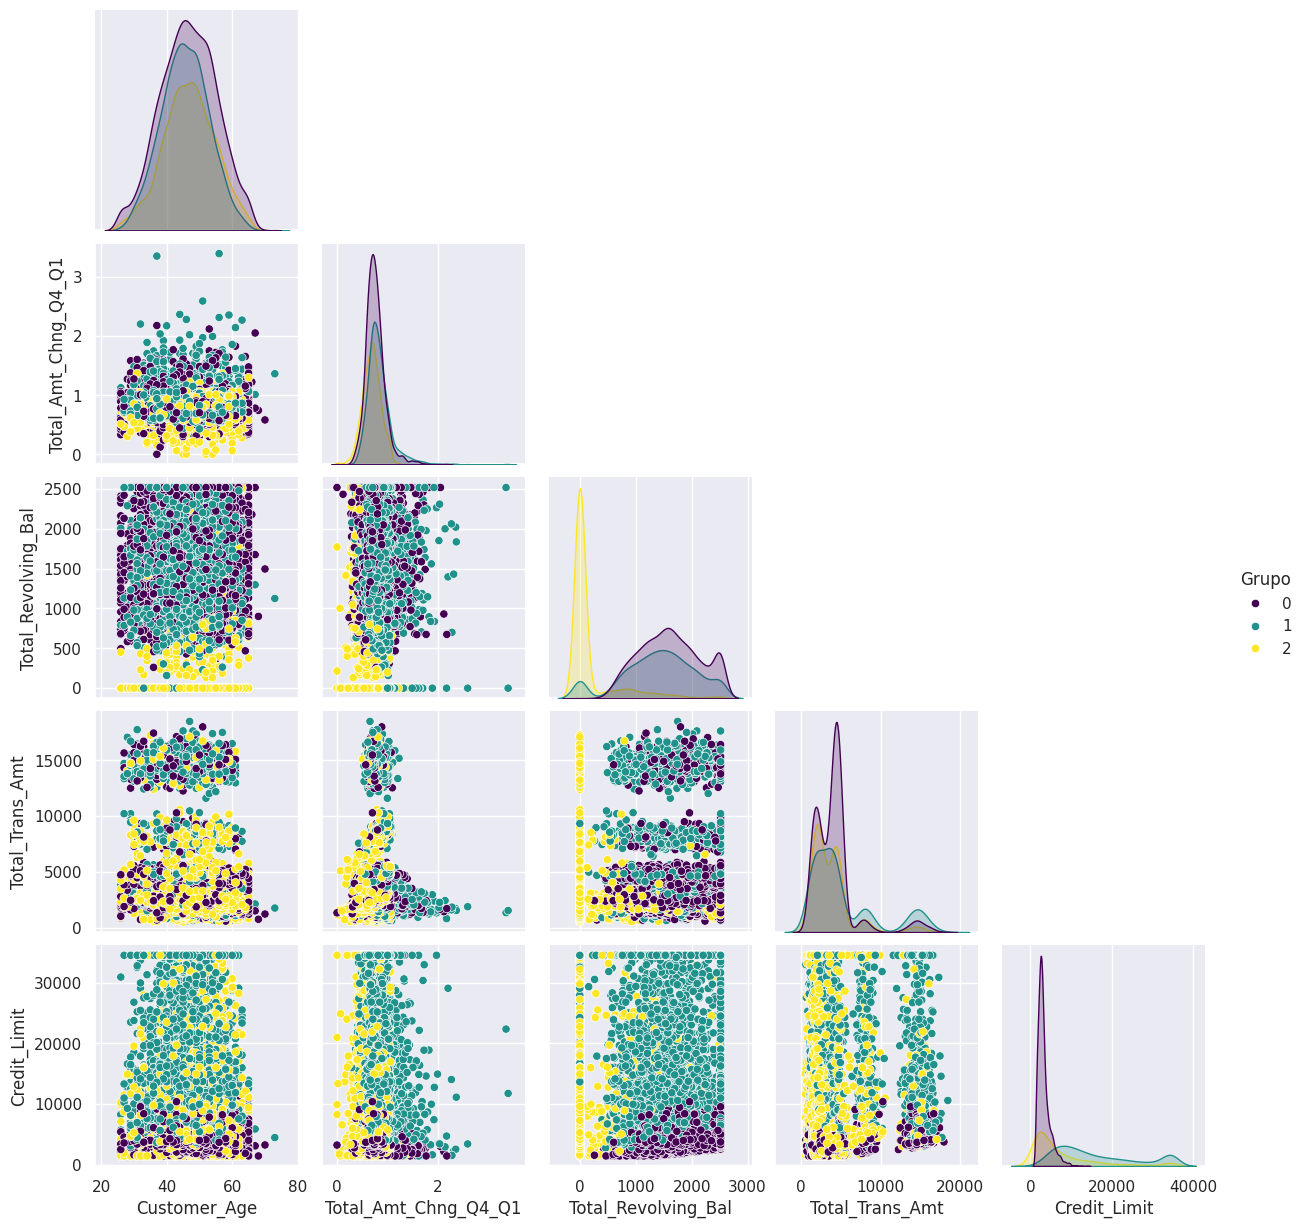

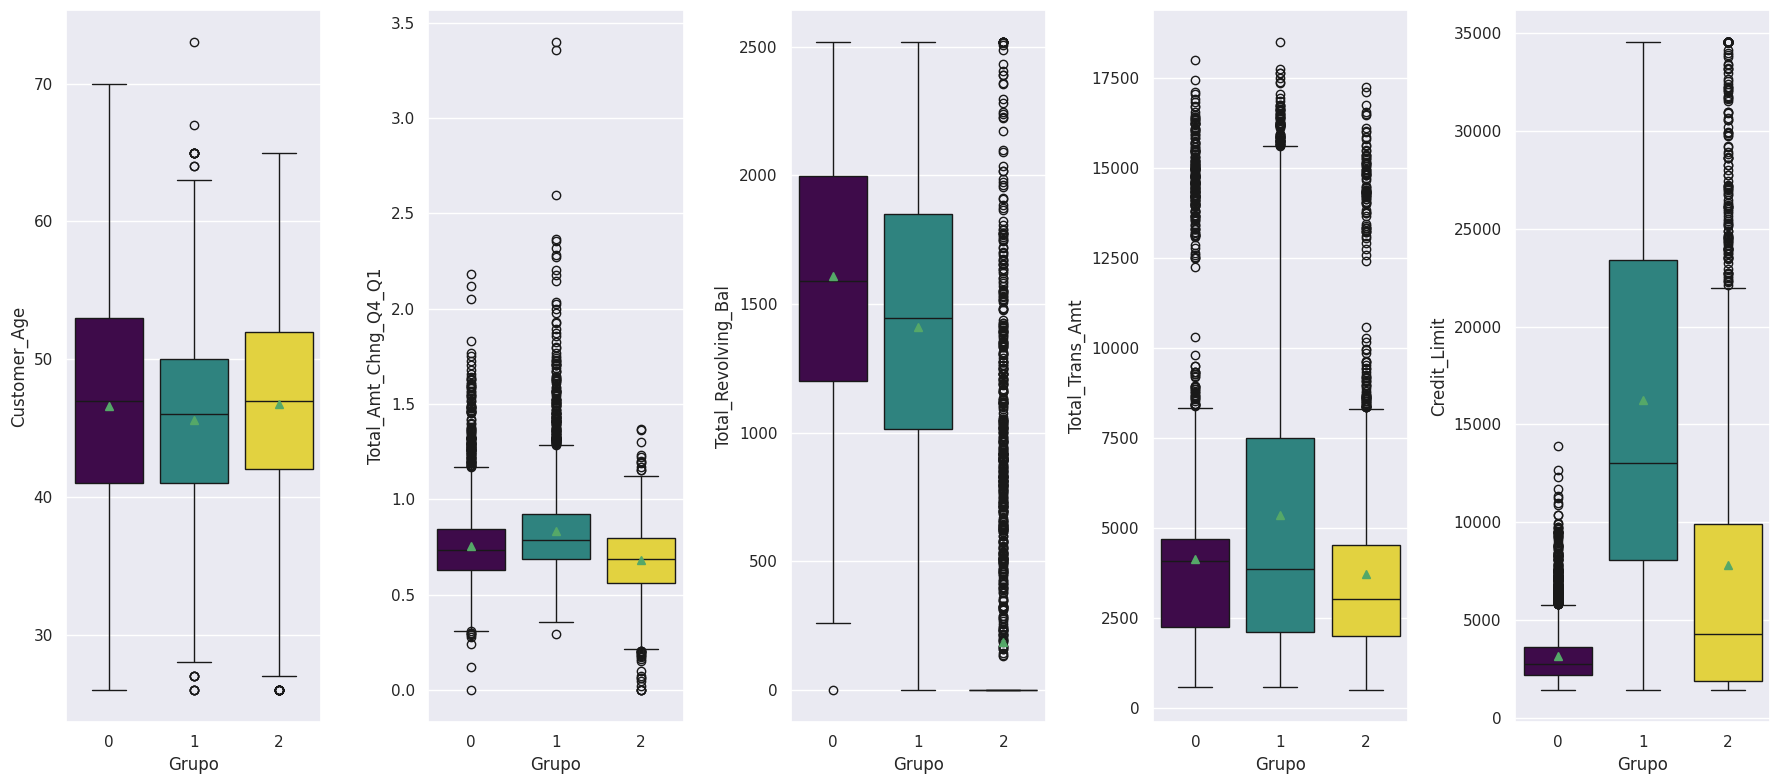

In [27]:
# Atributos numericos
atributos_num = ['Customer_Age','Total_Amt_Chng_Q4_Q1',
                 'Total_Revolving_Bal','Total_Trans_Amt','Credit_Limit']

# grafico de pares
sns.pairplot(df_grupos,
             hue='Grupo',
             vars=atributos_num,
             palette='viridis',
             corner=True
             )
plt.show()

#Grafico Boxplot
fig, axs = plt.subplots(1, 5, figsize=(18, 8))
cores = ['#440154','#21918c', '#fde725']

for i, col in enumerate(atributos_num):
    ax = axs[i]
    sns.boxplot(data=df_grupos,
                x='Grupo',
                y=col,
                ax=ax,
                palette=cores,
                showmeans=True
                )
    ax.set_xlabel('Grupo')
    ax.set_ylabel(col)
    ax.tick_params(axis='x', labelrotation=0)

# Ajusta o layout e exibe os graficos
plt.subplots_adjust(wspace=50)
plt.tight_layout()
plt.show()

### Observações

* **Customer_Age:** Os 3 Grupos possuem uma distribuição similar de clientes com diferentes idades, mas com maior concentração (50% dos dados) na faixa etária entre ~40 anos à 50-55 anos.
* **Total_Amt_Chng_Q4_Q1:** Distribuição Similar entre os 3 Grupos.
* **Credit_Limit e Total_Revolving_Bal:** O Grupo 0 possui majoritariamente cliente com limite de crédito abaixo dos \$ 5K, além deste grupo também ter 50% de pessoas com Saldo Rotativo entre \$ 1,2K à \$ 3K. O que, considerando o limite de crédito, é notório. Já o Grupo 1, embora tenha 50% de sua população com Saldo Rotativo entre \$ 1K e \$ 1,8K, também tem 50% do público com Limite de crédito maior, entre \$ 8,5K à \$ 24K. Por fim, o Grupo 2, Possui um público de 50% com limite de crédito entre \$ 3K e \$ 10K, mas majoritariamente, clientes com saldo rotativo zero.
* **Total_Trans_Amt:** Distribuição Similar entre os Grupos 0 e 2, aproximadamente 50% de seus respectivos clientes, com valor total de transferência entre \$ 2,45K à \$ 3,9K. Enquanto que o Grupo 1, possui uma maior distribuição, com 50% de seu público com valor total de transferência entre \$ 2,45K à \$ 7,5K.

# Conclusões

Pode-se concluir a respeito dos grupos formados para esta base de dados, o que se segue:

## Grupo 0:

* \> 90% Clientes sem atritos
* Majoritariamente Feminino (75%)
* Majoritariamente com Renda anual de até \$ 40K (60%)
* Majoritariamente clientes com limite de crédito abaixo dos \$ 5K
* 50% de clientes com Saldo Rotativo entre \$ 1,2K à \$ 3K
* 50% de clientes com Valor Total de Transferência entre \$ 2,45K à \$ 3,9K

## Grupo 1:

* \> 90% Clientes sem atritos
* Majoritariamente Masculino (90%)
* Majoritariamente clientes que ganham acima de \$ 40k (90%)
* 75% do público com Limite de crédito acima de \$ 8,5K
* 50% de clientes com Saldo Rotativo entre \$ 1K e \$ 1,8K
* 50% de clientes com Valor Total de Transferência entre \$ 2,45K à \$ 7,5K.

## Grupo 2:

* 40% de Clientes com Atrito
* Público balanceado entre Feminino e Masculino
* 60% de clientes que ganham acima de \$ 40K
* 50% com limite de crédito entre \$ 3K e \$ 10K
* Majoritariamente clientes com Saldo Rotativo zero
* 50% de clientes com Valor Total de Transferência entre \$ 2,45K à \$ 3,9K